In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sqlalchemy import create_engine, Table, Column, MetaData, Integer, String, ForeignKey, Boolean

In [4]:
import os
from main import main

if not os.path.exists('doencas-existentes/casos_obitos_doencas_preexistentes.csv'):
  main()

In [5]:
pre_df = pd.read_csv('doencas-existentes/casos_obitos_doencas_preexistentes.csv', sep=';').dropna()
pre_df.head()

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
0,Santo André,3547809,78.0,FEMININO,CONFIRMADO,2020-05-11T00:00:00Z,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
1,São Paulo,3550308,49.0,FEMININO,CONFIRMADO,2021-03-16T00:00:00Z,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2,São Paulo,3550308,33.0,FEMININO,CONFIRMADO,2021-04-14T00:00:00Z,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
4,São Paulo,3550308,46.0,FEMININO,CONFIRMADO,2021-03-24T00:00:00Z,1,NÃO,SIM,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO
5,São Paulo,3550308,55.0,FEMININO,CONFIRMADO,2021-04-20T00:00:00Z,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO


In [69]:
if os.path.exists('covid.db'):
  os.remove('covid.db')

In [70]:
engine = create_engine("sqlite:///covid.db")

In [71]:
metadata = MetaData(bind=engine)

Idade = Table('Idade', metadata,
  Column('idade', Integer, primary_key=True),
)
Sexo = Table('Sexo', metadata,
  Column('sexo', String, primary_key=True),
)
Municipio = Table('Municipio', metadata,
  Column('municipio', String, primary_key=True),
)

Paciente = Table('Paciente', metadata,
  Column('idade', Integer, ForeignKey("Idade.idade"), nullable=False),
  Column('sexo', String, ForeignKey("Sexo.sexo"), nullable=False),
  Column('municipio', String, ForeignKey("Municipio.municipio"), nullable=False),
  Column('asma', String, nullable=False),
  Column('obito', Boolean, nullable=False),
)
metadata.create_all(engine)

In [72]:
idade_list = pre_df.idade.dropna().unique()
sexo_list = pre_df.cs_sexo.dropna().unique()
municipio_list = pre_df.nome_munic.dropna().unique()

In [73]:
idade_dict = [
  {"idade": int(idade)}
  for idade in idade_list
]

sexo_dict = [
  {"sexo": sexo}
  for sexo in sexo_list
]

municipio_dict = [
  {"municipio": m}
  for m in municipio_list
]

In [74]:
engine.execute(Idade.insert().values(idade_dict))
engine.execute(Sexo.insert().values(sexo_dict))
engine.execute(Municipio.insert().values(municipio_dict))

In [75]:
pd.read_sql(
  """
  SELECT municipio FROM Municipio
  """,
  engine
)

,municipio
0,Santo André
1,São Paulo
2,Araçoiaba da Serra
3,Cajamar
4,Santos
...,...
641,Santa Salete
642,Não Informado
643,Pracinha
644,Santana da Ponte Pensa


In [76]:
pre_df.idade = pre_df.idade.apply(lambda x: int(x))
pre_df.head()

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
0,Santo André,3547809,78,FEMININO,CONFIRMADO,2020-05-11T00:00:00Z,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
1,São Paulo,3550308,49,FEMININO,CONFIRMADO,2021-03-16T00:00:00Z,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2,São Paulo,3550308,33,FEMININO,CONFIRMADO,2021-04-14T00:00:00Z,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
4,São Paulo,3550308,46,FEMININO,CONFIRMADO,2021-03-24T00:00:00Z,1,NÃO,SIM,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO
5,São Paulo,3550308,55,FEMININO,CONFIRMADO,2021-04-20T00:00:00Z,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO


In [77]:
renamed_df = pre_df[['idade', 'cs_sexo', 'nome_munic', 'obito', 'asma']].rename(columns={'cs_sexo':'sexo', 'nome_munic':'municipio'})
filtered_df = renamed_df[renamed_df.asma != 'IGNORADO']
paciente_dict = filtered_df.to_dict(orient='records')
paciente_dict[:1]

[{'idade': 46,
  'sexo': 'FEMININO',
  'municipio': 'São Paulo',
  'obito': 1,
  'asma': 'NÃO'}]

In [78]:
from tqdm import tqdm

cursor = 0
batch_size = 50000

for i in tqdm(range(batch_size, len(paciente_dict)+batch_size, batch_size)):
  if i > len(paciente_dict):
    engine.execute(Paciente.insert().values(paciente_dict[cursor:]))
  else:
    engine.execute(Paciente.insert().values(paciente_dict[cursor:i]))
    cursor = i

100%|██████████| 4/4 [00:19<00:00,  4.77s/it]


In [81]:
paciente_df = pd.read_sql(
  """
  SELECT * FROM Paciente
  """,
  engine
)

## Questão 5

1. Qual a porcentagem de pessoas que pegaram covid e tem asma?
2. Qual a proporção de casos pra cada sexo?
3. Qual a relação entre idade e óbito?
4. Quais municípios tiveram mais casos?
5. Quão relacionada está a asma com o óbito?

### Pergunta 1

In [91]:
df = pd.read_sql(
  """
  SELECT asma, count(asma) as quantidade
  FROM Paciente
  GROUP BY asma
  """,
  engine
)
df.head()

,asma,quantidade
0,NÃO,178599
1,SIM,13355


In [94]:
df['porcentagem'] = np.round(df['quantidade']*100/df.quantidade.sum(), decimals=2)
df.head()

,asma,quantidade,porcentagem
0,NÃO,178599,93.04
1,SIM,13355,6.96


<AxesSubplot:xlabel='asma', ylabel='porcentagem'>

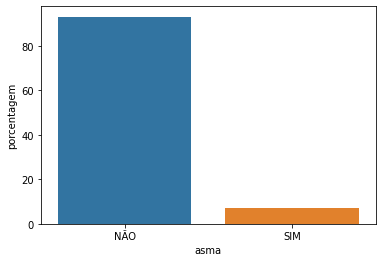

In [95]:
sns.barplot(x=df.asma, y=df.porcentagem)

### Pergunta 2

In [99]:
df = pd.read_sql(
  """
  SELECT sexo, count(sexo) as quantidade
  FROM Paciente
  WHERE sexo != 'IGNORADO'
  GROUP BY sexo
  """,
  engine
)
df.head()

,sexo,quantidade
0,FEMININO,90834
1,MASCULINO,101115


In [100]:
df['porcentagem'] = np.round(df['quantidade']*100/df.quantidade.sum(), decimals=2)
df.head()

,sexo,quantidade,porcentagem
0,FEMININO,90834,47.32
1,MASCULINO,101115,52.68


([<matplotlib.patches.Wedge at 0x7fb297f4e310>,
 [Text(0.09250479334876448, 1.096103491102689, 'FEMININO'),
  Text(-0.09250489597337944, -1.0961034824417604, 'MASCULINO')])

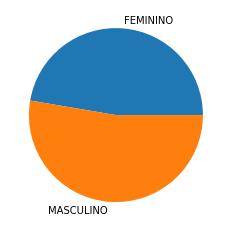

In [103]:
from matplotlib import pyplot as plt

plt.pie(x=df.porcentagem, labels=df.sexo)

### Pergunta 3

In [119]:
obito_df = pd.read_sql(
  """
  SELECT idade, count(obito) as morreu
  FROM Paciente
  WHERE obito=1
  GROUP BY idade
  ORDER BY morreu DESC
  """,
  engine
)

not_obito_df = pd.read_sql(
  """
  SELECT idade, count(obito) as sobreviveu
  FROM Paciente
  WHERE obito=0
  GROUP BY idade
  ORDER BY sobreviveu DESC
  """,
  engine
)

df = pd.merge(
  obito_df, 
  not_obito_df,
  on='idade'
)

df['porcentagem_morte'] = np.round(df.morreu*100/(df.morreu+df.sobreviveu), decimals=2)
df.head()

,idade,morreu,sobreviveu,porcentagem_morte
0,66,1875,2788,40.21
1,67,1857,2728,40.50
2,68,1856,2552,42.11
3,72,1852,2250,45.15
4,70,1842,2420,43.22


<AxesSubplot:xlabel='idade', ylabel='porcentagem_morte'>

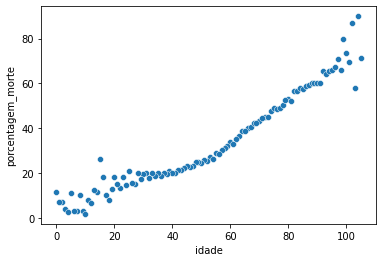

In [120]:
sns.scatterplot(x=df.idade, y=df.porcentagem_morte)

### Pergunta 4

In [106]:
df = pd.read_sql(
  """
  SELECT municipio, count(municipio) as quantidade
  FROM Paciente
  GROUP BY municipio
  ORDER BY quantidade DESC
  """,
  engine
)
df.head()

,municipio,quantidade
0,São Paulo,43496
1,Campinas,9585
2,São José do Rio Preto,7616
3,São Bernardo do Campo,5117
4,Ribeirão Preto,4938


<AxesSubplot:xlabel='municipio', ylabel='quantidade'>

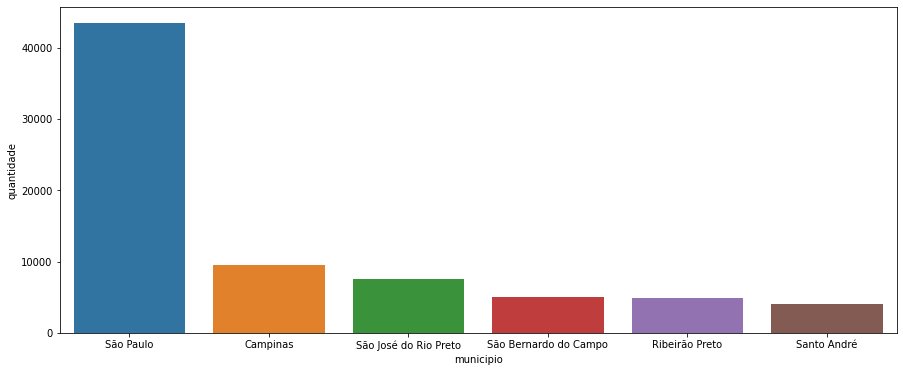

In [110]:
show = df[df.index <= 5]

fig_size = (15,6)
fig, ax = plt.subplots(figsize=fig_size)
sns.barplot(x=show.municipio, y=show.quantidade, ax=ax)

### Pergunta 5

In [121]:
obito_df = pd.read_sql(
  """
  SELECT asma, count(obito) as morreu
  FROM Paciente
  WHERE obito=1
  GROUP BY asma
  ORDER BY morreu DESC
  """,
  engine
)

not_obito_df = pd.read_sql(
  """
  SELECT asma, count(obito) as sobreviveu
  FROM Paciente
  WHERE obito=0
  GROUP BY asma
  ORDER BY sobreviveu DESC
  """,
  engine
)

df = pd.merge(
  obito_df, 
  not_obito_df,
  on='asma'
)

df['porcentagem_morte'] = np.round(df.morreu*100/(df.morreu+df.sobreviveu), decimals=2)
df.head()

,asma,morreu,sobreviveu,porcentagem_morte
0,NÃO,66291,112308,37.12
1,SIM,3404,9951,25.49


<AxesSubplot:xlabel='asma', ylabel='porcentagem_morte'>

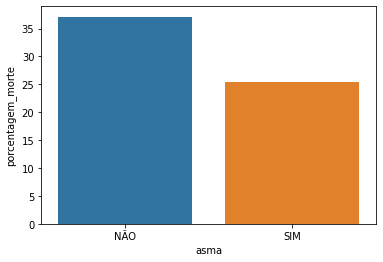

In [123]:
sns.barplot(x=df.asma, y=df.porcentagem_morte)

## Questão 6

In [141]:
df = pd.read_sql(
  """
  SELECT idade, sexo, obito
  FROM Paciente
  """,
  engine
)

X = df.idade
y = df.obito

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, precision_score

X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1,1),y, test_size=0.2, random_state=40)

classifier = LogisticRegression()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

print('Acurácia: ', accuracy_score(y_test, y_pred))
print('Precisão: ', precision_score(y_test, y_pred))

Acurácia:  0.6570029433981923
Precisão:  0.5708020050125313
